In [43]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import yfinance as yf

In [61]:
df_nikkey = yf.download("^N225", start="1985-02-21", end="2008-12-30")
df_toyota = yf.download("7203.T", start="1985-02-21", end="2008-12-30")


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


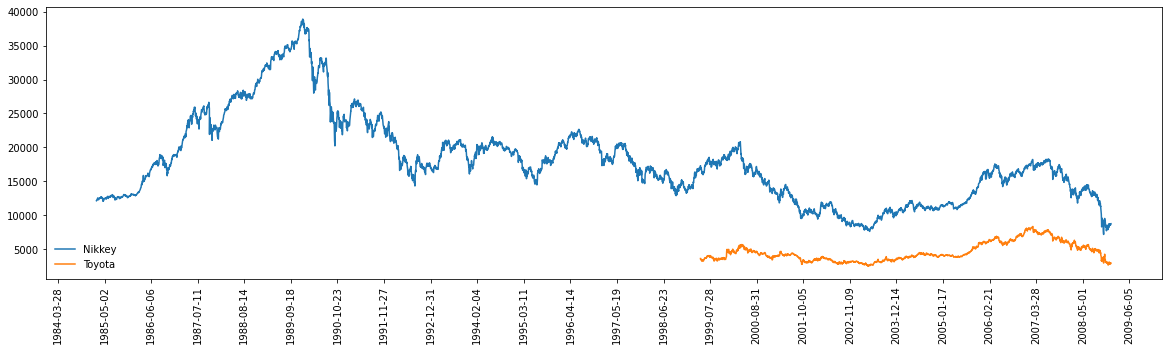

In [62]:
fig = plt.figure(figsize=(20, 5))
ax = fig.add_subplot(111)

ax.plot(df_nikkey['Close'], label="Nikkey")
ax.plot(df_toyota['Close'], label="Toyota")

ax.xaxis.set_major_locator(plt.MaxNLocator(30))

ax.legend(loc='lower left', frameon=False)
plt.xticks(rotation=90)
plt.show();

## IMPORTANTE!
Como no yfinance só temos o 
Continuar somente com o Índice Nikkey 225, por enquanto.

In [74]:
df_nikkey["p/e"] = df_nikkey["Close"]/df_nikkey.loc["1985-02-21","Close"]
df_nikkey["rt"] = (np.log(df_nikkey["Close"]) - np.log(df_nikkey["Close"].shift(periods=1)))*100
df_nikkey = df_nikkey[1:]
df_nikkey.head()

,Open,High,Low,Close,Adj Close,Volume,p/e,rt,Cluster
Date,,,,,,,,,
1985-02-22,12147.059570,12147.059570,12147.059570,12147.059570,12147.059570,0,1.001534,0.153238,C4
1985-02-25,12201.040039,12201.040039,12201.040039,12201.040039,12201.040039,0,1.005984,0.443407,C5
1985-02-26,12194.969727,12194.969727,12194.969727,12194.969727,12194.969727,0,1.005484,-0.049765,C3
1985-02-27,12287.379883,12287.379883,12287.379883,12287.379883,12287.379883,0,1.013103,0.754916,C5
1985-02-28,12321.919922,12321.919922,12321.919922,12321.919922,12321.919922,0,1.015951,0.280707,C4


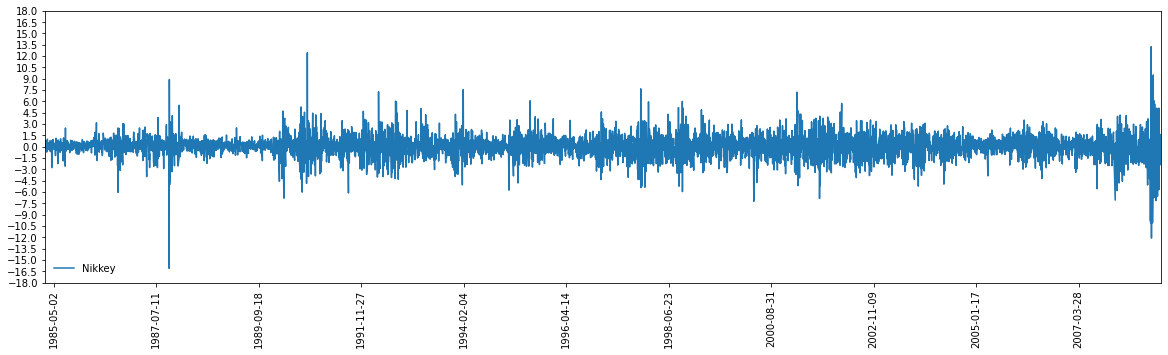

In [75]:
fig = plt.figure(figsize=(20, 5))
ax = fig.add_subplot(111)

date_min = df_nikkey.index.min()
date_max = df_nikkey.index.max()

ax.plot(df_nikkey['rt'], label="Nikkey")

ax.xaxis.set_major_locator(plt.MaxNLocator(13))
ax.yaxis.set_major_locator(plt.MaxNLocator(30))
ax.set_ylim(-18, 18)
ax.set_xlim(left=date_min, right=date_max)

ax.legend(loc='lower left', frameon=False)
plt.xticks(rotation=90)
plt.show();

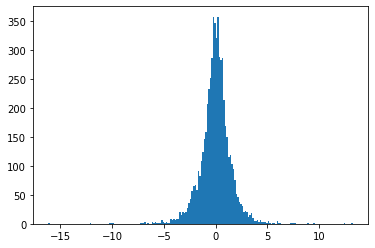

In [76]:
n_bins = 200
plt.hist(df_nikkey['rt'], label="Nikkey", bins=n_bins);

In [77]:
nikkey = yf.Ticker("7203.T")
# "^N225"
nikkey.quarterly_earnings

,Revenue,Earnings
Quarter,,
2Q2020,4600796000000,158843000000
3Q2020,6774427000000,470525000000
4Q2020,8150032000000,838696000000
1Q2021,7689337000000,777197000000


## Agrupamento dos $r_{t}$

### Agrupamentos uniformes

In [80]:
conditions  = [
    df_nikkey["rt"] < -1.12,
    (df_nikkey["rt"] >= -1.12) & (df_nikkey["rt"] < -0.42),
    (df_nikkey["rt"] >= -0.42) & (df_nikkey["rt"] < 0),
    (df_nikkey["rt"] >= 0) & (df_nikkey["rt"] < 0.44),
    (df_nikkey["rt"] >= 0.44) & (df_nikkey["rt"] < 1.07),
    df_nikkey["rt"] >= 1.07]
choices = [ "C1", "C2", "C3", "C4", "C5", "C6"]

df_nikkey["Cluster"] = np.select(conditions, choices, default=np.nan)

df_nikkey.head()

<ipython-input-80-4e7c3760c039>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nikkey["Cluster"] = np.select(conditions, choices, default=np.nan)


,Open,High,Low,Close,Adj Close,Volume,p/e,rt,Cluster
Date,,,,,,,,,
1985-02-22,12147.059570,12147.059570,12147.059570,12147.059570,12147.059570,0,1.001534,0.153238,C4
1985-02-25,12201.040039,12201.040039,12201.040039,12201.040039,12201.040039,0,1.005984,0.443407,C5
1985-02-26,12194.969727,12194.969727,12194.969727,12194.969727,12194.969727,0,1.005484,-0.049765,C3
1985-02-27,12287.379883,12287.379883,12287.379883,12287.379883,12287.379883,0,1.013103,0.754916,C5
1985-02-28,12321.919922,12321.919922,12321.919922,12321.919922,12321.919922,0,1.015951,0.280707,C4


In [82]:
round(df_nikkey.groupby(by=["Cluster"]).agg({"rt": "mean"}), 2)

,rt
Cluster,
C1,-2.19
C2,-0.73
C3,-0.20
C4,0.21
C5,0.72
C6,2.04


In [90]:
df_nikkey["t"] = np.arange(1, len(df_nikkey)+1)
df_nikkey.head()

<ipython-input-90-f7d4045eac70>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nikkey["t"] = np.arange(1, len(df_nikkey)+1)


,Open,High,Low,Close,Adj Close,Volume,p/e,rt,Cluster,t
Date,,,,,,,,,,
1985-02-22,12147.059570,12147.059570,12147.059570,12147.059570,12147.059570,0,1.001534,0.153238,C4,1
1985-02-25,12201.040039,12201.040039,12201.040039,12201.040039,12201.040039,0,1.005984,0.443407,C5,2
1985-02-26,12194.969727,12194.969727,12194.969727,12194.969727,12194.969727,0,1.005484,-0.049765,C3,3
1985-02-27,12287.379883,12287.379883,12287.379883,12287.379883,12287.379883,0,1.013103,0.754916,C5,4
1985-02-28,12321.919922,12321.919922,12321.919922,12321.919922,12321.919922,0,1.015951,0.280707,C4,5
